In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Movie Review/IMDB Dataset.csv' './moviereviews.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
cp: cannot stat '/content/gdrive/My Drive/Movie Review/IMDB Dataset.csv': No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
data_test = pd.read_excel('/content/gdrive/MyDrive/Movie Review/IMDB Movie Review Train/test.xlsx', dtype= str)
data_train = pd.read_excel('/content/gdrive/MyDrive/Movie Review/IMDB Movie Review Train/train.xlsx', dtype = str)

In [ ]:
#  data_train = pd.read_excel('/content/gdrive/MyDrive/Movie Review/IMDB Movie Review Train/train.xlsx', dtypdre = str)

In [ ]:
data_train.sample(5)

,Reviews,Sentiment
18695,Greta Garbo's American film debut is an analog...,pos
1365,"When I rented ""Unhinged"", I was expecting a go...",neg
23118,"This film was bad. Bad acting, bad directing, ...",neg
17233,This is the last time I rent a video without c...,neg
1237,This was the second entry in the regular Colum...,pos


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


# BERT-Base

In [ ]:
# (X_train, y_train), (X_test, y_test), preproc #BERT normal left statement

In [ ]:
(train, val, preproc) = text.texts_from_df(train_df = data_train, 
                                           text_column = 'Reviews', 
                                           label_columns = 'Sentiment', 
                                           val_df = data_test,
                                           maxlen = 512, #reduce to maybe 400 for training time reduction, but not in production
                                           preprocess_mode = 'bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
# model = text.text_classifier(name = 'bert', train_data = (X_train, y_train), preproc = preproc) #BERT norm

In [ ]:
model = text.text_classifier(name = 'bert', train_data = train, preproc=preproc)

Is Multi-Label? False
maxlen is 512
done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = train,
                             val_data = val,
                             batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4167/4167 [==============================] - 818s 191ms/step - loss: 3.3178 - accuracy: 0.6064


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


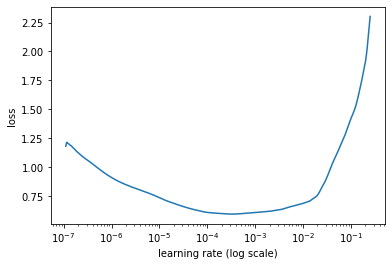

In [ ]:
#found the best learning rate
# learner.lr_find()
# learner.lr_plot()

#could take hours to days

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4167/4167 [==============================] - 2973s 709ms/step - loss: 0.2604 - accuracy: 0.8931 - val_loss: 0.1354 - val_accuracy: 0.9520
Epoch 2/2
4167/4167 [==============================] - 2953s 709ms/step - loss: 0.1289 - accuracy: 0.9546 - val_loss: 0.0433 - val_accuracy: 0.9902


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
predictor.save('/content/drive/My Drive/BERT_IMDB_Movie_Flask')

In [ ]:
# data = ['This movie was really bad. Acting was also bad.', 
        # 'This movie was really great. I will see it again',
        # 'Another great movie. A must watch']

In [ ]:
# predictor.predict(data)

In [ ]:
# predictor.get_classes()

In [ ]:
# predictor.predict(data, return_proba=True)

In [ ]:
# predictor.predict(data[0])